## Acquisition Analytics Assignment : Bank Marketing



### Quesion 1) Data Understanding & Preparation



In [1515]:
import warnings
warnings.filterwarnings('ignore')

In [1516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [1517]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [1518]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1519]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [1520]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [1521]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [1522]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [1523]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [1524]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [1525]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

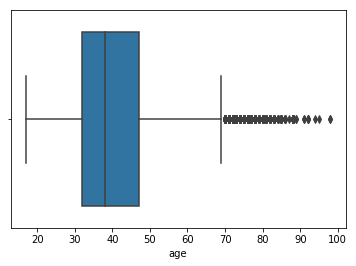

In [1526]:
sns.boxplot(x='age', data=loan)
plt.show()

In [1527]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

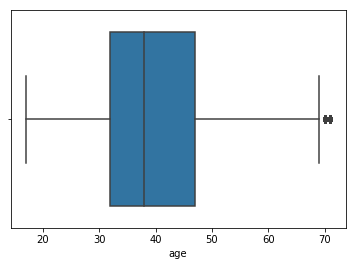

In [1528]:
sns.boxplot(x='age', data=loan)
plt.show()

In [1529]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [1530]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [1531]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [1532]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [1533]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [1534]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


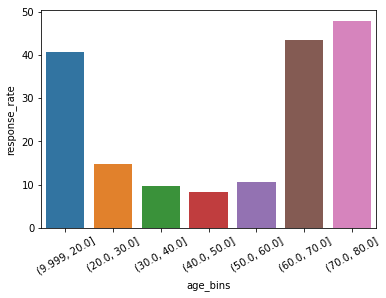

In [1535]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [1536]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [1537]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [1538]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [1539]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [1540]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [1541]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [1542]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


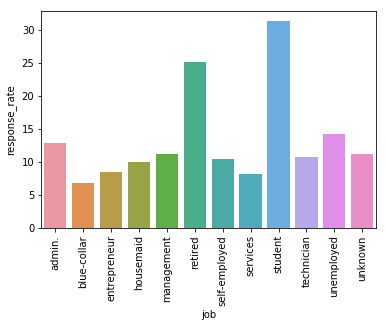

In [1543]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [1544]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [1545]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [1546]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [1547]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [1548]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [1549]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [1550]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


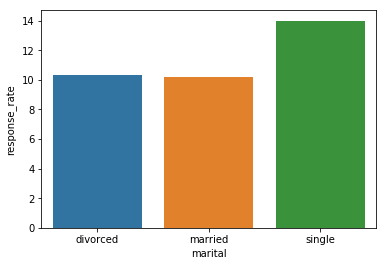

In [1551]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [1552]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [1553]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [1554]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [1555]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [1556]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [1557]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [1558]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [1559]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


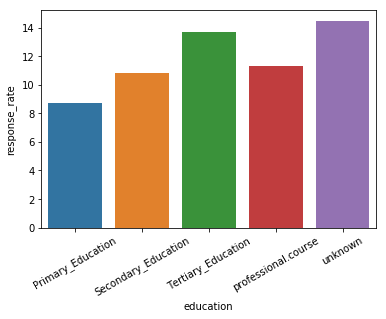

In [1560]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [1561]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [1562]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [1563]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [1564]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [1565]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [1566]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


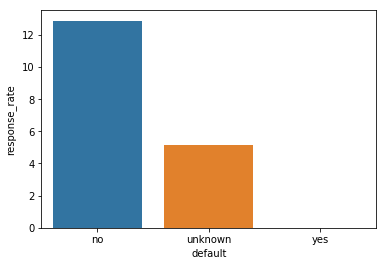

In [1567]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [1568]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [1569]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [1570]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [1571]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [1572]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [1573]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


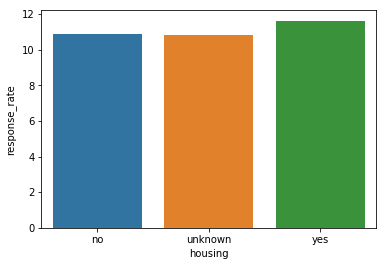

In [1574]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [1575]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [1576]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [1577]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [1578]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [1579]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [1580]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


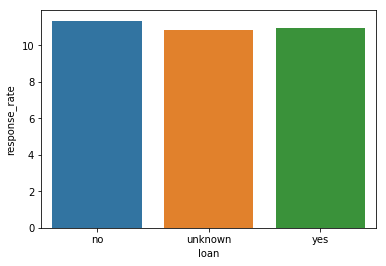

In [1581]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [1582]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [1583]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [1584]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [1585]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [1586]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [1587]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


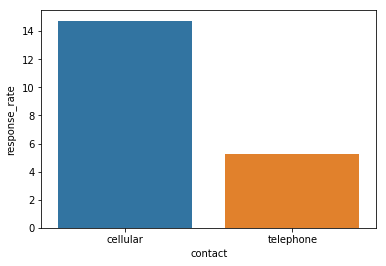

In [1588]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [1589]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [1590]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [1591]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [1592]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [1593]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [1594]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


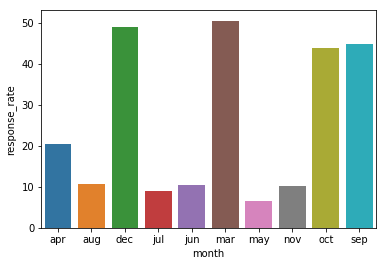

In [1595]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [1596]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [1597]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [1598]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [1599]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [1600]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [1601]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


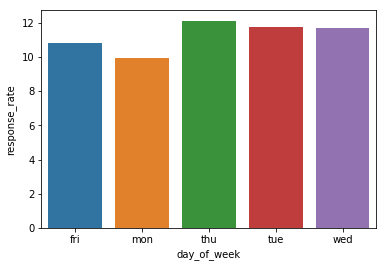

In [1602]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

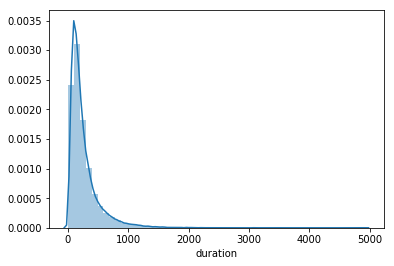

In [1603]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [1604]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

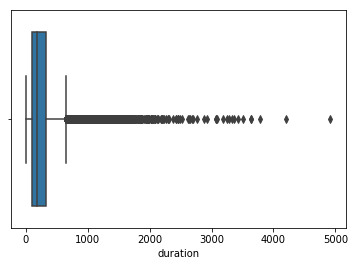

In [1605]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [1606]:
loan['duration'][loan['duration']>1271] =1271

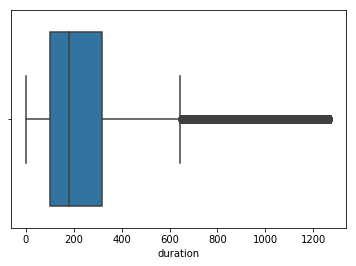

In [1607]:
sns.boxplot(x='duration', data=loan)
plt.show()

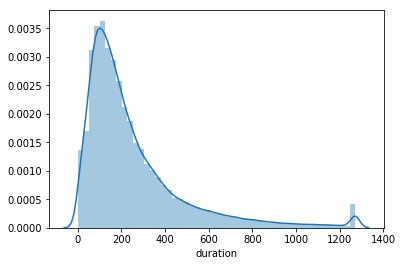

In [1608]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [1609]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

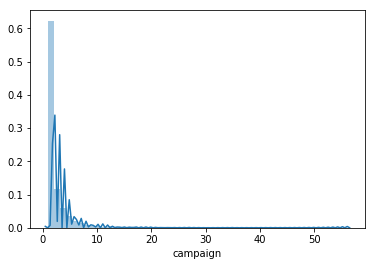

In [1610]:
sns.distplot(loan['campaign'])
plt.show()

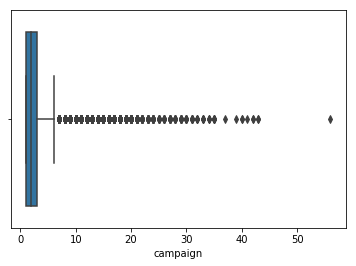

In [1611]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [1612]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [1613]:
loan['campaign'][loan['campaign']>14] =14

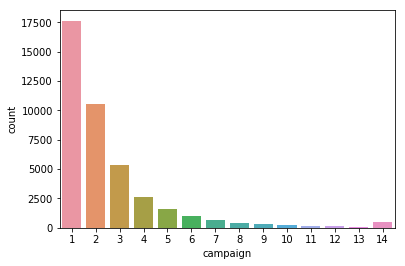

In [1614]:
sns.countplot(loan['campaign'])
plt.show()

In [1615]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [1616]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [1617]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [1618]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [1619]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


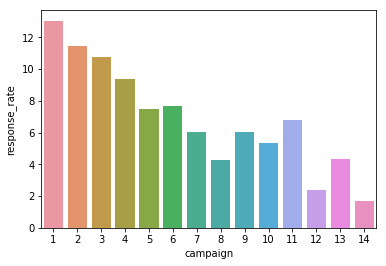

In [1620]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [1621]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [1622]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [1623]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [1624]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [1625]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [1626]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [1627]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [1628]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


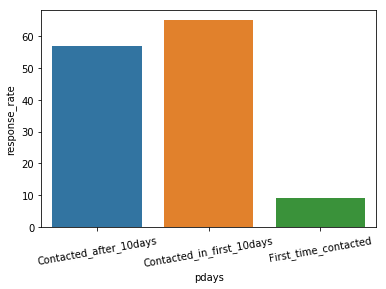

In [1629]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [1630]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [1631]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [1632]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [1633]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [1634]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [1635]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [1636]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [1637]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


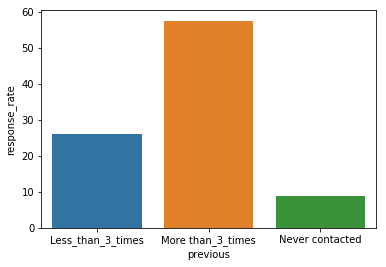

In [1638]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [1639]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

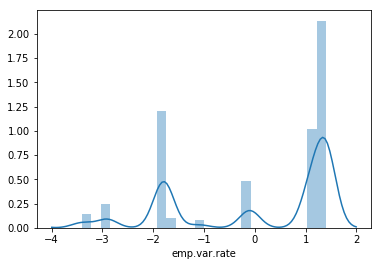

In [1640]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [1641]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [1642]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [1643]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [1644]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [1645]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [1646]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [1647]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


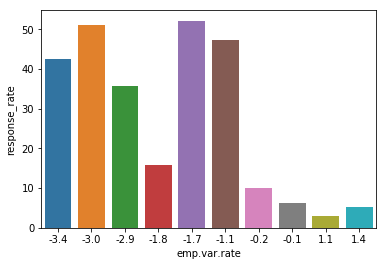

In [1648]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

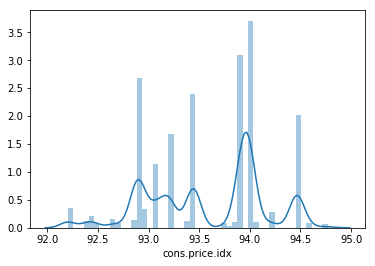

In [1649]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [1650]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [1651]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

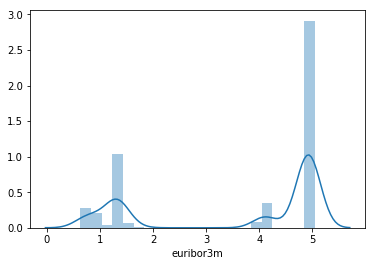

In [1652]:
sns.distplot(loan['euribor3m'])
plt.show()

In [1653]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

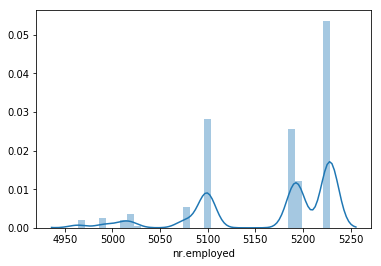

In [1654]:
sns.distplot(loan['nr.employed'])
plt.show()

In [1655]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [1656]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [1657]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [1658]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [1659]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [1660]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [1661]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [1662]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [1663]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [1664]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [1665]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [1666]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [1667]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [1668]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [1669]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [1670]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [1671]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [1672]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [1673]:
# Drop all features for whom dummy variable has been created as well as "Duration"

loan.drop(columns = ['duration','job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [1674]:
loan.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [1675]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [1676]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [1677]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [1678]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [1679]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [1680]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [1681]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [1682]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [1683]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [1684]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [1685]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [1686]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [1687]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [1688]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [1689]:
import statsmodels.api as sm

### Question 2) Modelling  - Logistic Regression



In [1690]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1691]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1692]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Sun, 21 Jul 2019   Deviance:                       15867.
Time:                        18:49:59   Pearson chi2:                 2.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0.211       0.181
month_jun                          -0.6888      0.132     -5.2

In [1693]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)  
rfe = rfe.fit(X_train, y_train)

In [1694]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('job_blue-collar', False, 8),
 ('job_entrepreneur', False, 7),
 ('job_housemaid', False, 34),
 ('job_management', False, 13),
 ('job_retired', False, 2),
 ('job_self-employed', False, 24),
 ('job_services', False, 22),
 ('job_student', True, 1),
 ('job_technician', False, 31),
 ('job_unemployed', False, 30),
 ('job_unknown', False, 19),
 ('marital_married', False, 26),
 ('marital_single', False, 23),
 ('education_Secondary_Education', False, 32),
 ('education_Tertiary_Education', False, 14),
 ('education_professional.course', False, 25),
 ('education_unknown', False, 12),
 ('default_unknown', True, 1),
 ('default_yes', False, 21),
 ('housing_unknown', False, 18),
 ('housing_yes', False, 28),
 ('loan_unknown', False, 27),
 ('loan_yes', False, 36),
 ('contact_telephone', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 4),
 ('month_jul', False, 35),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 20),
 ('

In [1695]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,job_student,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,month_nov,day_of_week_mon,pdays_First_time_contacted,previous_Never contacted,poutcome_success,emp.var.rate,cons.price.idx,euribor3m
7019,0,0,1,0,0,0,1,0,0,1,1,0,0.649758,0.723298,0.715448
27175,0,0,1,0,0,0,0,1,0,1,1,0,-0.114599,-0.650827,0.231937
15817,0,0,0,0,0,0,0,0,1,1,1,0,0.840847,0.591769,0.773077
40971,0,0,0,0,0,0,0,0,1,1,0,0,-0.751563,1.773794,-1.509050
8467,0,0,1,0,1,0,0,0,0,1,1,0,0.840847,1.538427,0.717753


In [1696]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7972.6
Date:                Sun, 21 Jul 2019   Deviance:                       15945.
Time:                        18:50:09   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4597      0.215     -6.793      0.000      -1.881      -1.039
job_student                    0.3090      0.105      2.949      0.003       0.104       0.514
default_unknown               -0.3084      0.067     -4.575      0.000      -0.441      -0.176
contact_telephone             -0.5551      0.069     -8.006      0.000      -0.691      -0.419
month_aug                      0.5132      0.078      6.540      0.000       0.359       0.667
month_jun                     -0.6064      0.082     -7.418      0.000      -0.767      -0.446
month_mar                      1.3251      0.119     11.173      0.000       1.093       1.558
month_may                     -0.5252      0.063     -8.331      0.000      -0.649      -0.402
month_nov                     -0.5885      0.085     -6.937      0.000      -0.755      -0.422
day_of_week_mon               -0.3310      0.054     -6.097      0.000      -0.437      -0.225
pdays_First_time_contacted    -0.9739      0.216     -4.518      0.000      -1.396      -0.551
previous_Never contacted       0.4852      0.067      7.241      0.000       0.354       0.617
poutcome_success               0.8942      0.219      4.086      0.000       0.465       1.323
emp.var.rate                  -2.4413      0.149    -16.410      0.000      -2.733      -2.150
cons.price.idx                 0.9868      0.057     17.399      0.000       0.876       1.098
euribor3m                      1.0224      0.124      8.239      0.000       0.779       1.266
==============================================================================================
"""

In [1697]:
# Make a VIF dataframe for all the variables present to check multi colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,emp.var.rate,75.09
14,euribor3m,50.86
9,pdays_First_time_contacted,15.16
10,previous_Never contacted,11.93
13,cons.price.idx,11.30
2,contact_telephone,4.77
6,month_may,3.32
3,month_aug,2.56
4,month_jun,2.29
7,month_nov,1.92


In [1698]:
#Dropping emp.var.rate as it has high VIF
X_train_rfe.drop('emp.var.rate', axis = 1, inplace = True)

In [1699]:
# Refit the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.3
Date:                Sun, 21 Jul 2019   Deviance:                       16207.
Time:                        18:50:09   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3334      0.212     -6.284      0.000      -1.749      -0.918
job_student                    0.3809      0.103      3.696      0.000       0.179       0.583
default_unknown               -0.3557      0.067     -5.304      0.000      -0.487      -0.224
contact_telephone             -0.1751      0.062     -2.803      0.005      -0.298      -0.053
month_aug                      0.0450      0.071      0.634      0.526      -0.094       0.184
month_jun                      0.0085      0.074      0.116      0.908      -0.136       0.153
month_mar                      0.7908      0.115      6.870      0.000       0.565       1.016
month_may                     -0.9389      0.057    -16.434      0.000      -1.051      -0.827
month_nov                     -0.1173      0.079     -1.486      0.137      -0.272       0.037
day_of_week_mon               -0.3309      0.054     -6.175      0.000      -0.436      -0.226
pdays_First_time_contacted    -1.1627      0.213     -5.470      0.000      -1.579      -0.746
previous_Never contacted       0.4774      0.065      7.302      0.000       0.349       0.606
poutcome_success               0.8134      0.216      3.771      0.000       0.391       1.236
cons.price.idx                 0.1748      0.027      6.573      0.000       0.123       0.227
euribor3m                     -0.9600      0.030    -32.211      0.000      -1.018      -0.902
==============================================================================================
"""

In [1700]:
# Dropping month June as it has high p-value
X_train_rfe.drop('month_jun', axis = 1, inplace = True)

In [1701]:
# Refit the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.3
Date:                Sun, 21 Jul 2019   Deviance:                       16207.
Time:                        18:50:10   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3322      0.212     -6.286      0.000      -1.748      -0.917
job_student                    0.3808      0.103      3.695      0.000       0.179       0.583
default_unknown               -0.3557      0.067     -5.304      0.000      -0.487      -0.224
contact_telephone             -0.1728      0.059     -2.913      0.004      -0.289      -0.057
month_aug                      0.0435      0.070      0.623      0.533      -0.093       0.180
month_mar                      0.7890      0.114      6.914      0.000       0.565       1.013
month_may                     -0.9410      0.054    -17.334      0.000      -1.047      -0.835
month_nov                     -0.1190      0.078     -1.532      0.126      -0.271       0.033
day_of_week_mon               -0.3308      0.054     -6.174      0.000      -0.436      -0.226
pdays_First_time_contacted    -1.1624      0.213     -5.469      0.000      -1.579      -0.746
previous_Never contacted       0.4775      0.065      7.304      0.000       0.349       0.606
poutcome_success               0.8138      0.216      3.774      0.000       0.391       1.236
cons.price.idx                 0.1752      0.026      6.623      0.000       0.123       0.227
euribor3m                     -0.9601      0.030    -32.240      0.000      -1.018      -0.902
==============================================================================================
"""

In [1702]:
# Dropping month Aug as it has high p-value
X_train_rfe.drop('month_aug', axis = 1, inplace = True)

In [1703]:
# Refit the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.5
Date:                Sun, 21 Jul 2019   Deviance:                       16207.
Time:                        18:50:10   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3102      0.209     -6.273      0.000      -1.720      -0.901
job_student                    0.3835      0.103      3.726      0.000       0.182       0.585
default_unknown               -0.3570      0.067     -5.325      0.000      -0.488      -0.226
contact_telephone             -0.1760      0.059     -2.978      0.003      -0.292      -0.060
month_mar                      0.7808      0.113      6.890      0.000       0.559       1.003
month_may                     -0.9504      0.052    -18.232      0.000      -1.053      -0.848
month_nov                     -0.1330      0.074     -1.789      0.074      -0.279       0.013
day_of_week_mon               -0.3314      0.054     -6.187      0.000      -0.436      -0.226
pdays_First_time_contacted    -1.1717      0.212     -5.528      0.000      -1.587      -0.756
previous_Never contacted       0.4764      0.065      7.292      0.000       0.348       0.604
poutcome_success               0.8093      0.215      3.757      0.000       0.387       1.232
cons.price.idx                 0.1695      0.025      6.818      0.000       0.121       0.218
euribor3m                     -0.9538      0.028    -34.030      0.000      -1.009      -0.899
==============================================================================================
"""

In [1704]:
# Dropping month Nov as it has high p-value
X_train_rfe.drop('month_nov', axis = 1, inplace = True)

In [1705]:
# Refit the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.2
Date:                Sun, 21 Jul 2019   Deviance:                       16210.
Time:                        18:50:10   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3524      0.208     -6.514      0.000      -1.759      -0.945
job_student                    0.3851      0.103      3.739      0.000       0.183       0.587
default_unknown               -0.3495      0.067     -5.223      0.000      -0.481      -0.218
contact_telephone             -0.1719      0.059     -2.909      0.004      -0.288      -0.056
month_mar                      0.7958      0.113      7.038      0.000       0.574       1.017
month_may                     -0.9336      0.051    -18.189      0.000      -1.034      -0.833
day_of_week_mon               -0.3311      0.054     -6.179      0.000      -0.436      -0.226
pdays_First_time_contacted    -1.1591      0.212     -5.471      0.000      -1.574      -0.744
previous_Never contacted       0.4853      0.065      7.460      0.000       0.358       0.613
poutcome_success               0.8205      0.215      3.810      0.000       0.398       1.243
cons.price.idx                 0.1775      0.024      7.258      0.000       0.130       0.225
euribor3m                     -0.9641      0.027    -35.145      0.000      -1.018      -0.910
==============================================================================================
"""

In [1706]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pdays_First_time_contacted,12.45
7,previous_Never contacted,11.72
2,contact_telephone,3.17
9,cons.price.idx,2.65
10,euribor3m,2.49
4,month_may,2.05
1,default_unknown,1.33
5,day_of_week_mon,1.26
8,poutcome_success,1.15
3,month_mar,1.06


In [1707]:
# Dropping pdays_First_time_contacted due to high VIF
X_train_rfe.drop('pdays_First_time_contacted', axis = 1, inplace = True)

In [1708]:
# Refit the model
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28820
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8119.7
Date:                Sun, 21 Jul 2019   Deviance:                       16239.
Time:                        18:50:10   Pearson chi2:                 3.12e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4365      0.065    -37.636      0.000      -2.563      -2.310
job_student                  0.4153      0.102      4.057      0.000       0.215       0.616
default_unknown             -0.3522      0.067     -5.268      0.000      -0.483      -0.221
contact_telephone           -0.1758      0.059     -2.976      0.003      -0.292      -0.060
month_mar                    0.7983      0.113      7.080      0.000       0.577       1.019
month_may                   -0.9441      0.051    -18.416      0.000      -1.045      -0.844
day_of_week_mon             -0.3312      0.054     -6.186      0.000      -0.436      -0.226
previous_Never contacted     0.4123      0.063      6.580      0.000       0.290       0.535
poutcome_success             1.8979      0.090     21.185      0.000       1.722       2.073
cons.price.idx               0.1868      0.024      7.665      0.000       0.139       0.235
euribor3m                   -0.9724      0.027    -35.543      0.000      -1.026      -0.919
============================================================================================
"""

In [1709]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,contact_telephone,3.12
8,cons.price.idx,2.62
6,previous_Never contacted,2.40
9,euribor3m,2.37
4,month_may,2.02
1,default_unknown,1.31
5,day_of_week_mon,1.24
7,poutcome_success,1.13
3,month_mar,1.06
0,job_student,1.05


#### Since both p-values and VIF is in acceptable range the above model is satisfactory

In [1710]:
X_train_rfe.shape

(28831, 10)

In [1711]:
#Making predictions on y_train data
y_train_predict = res.predict(X_train_sm)
y_train_predict

7019     0.024018
27175    0.072619
15817    0.047583
40971    0.275087
8467     0.068463
21860    0.040190
11416    0.065145
27833    0.412356
26816    0.083010
28102    0.271451
30318    0.636958
3563     0.024031
24098    0.061366
3760     0.024031
32681    0.097925
38892    0.687551
40265    0.428666
3809     0.017018
36281    0.161432
36189    0.404319
3534     0.017018
8752     0.068392
28325    0.275236
6106     0.024057
25835    0.081152
19909    0.056148
2380     0.017046
13239    0.064980
20634    0.040169
4320     0.017046
           ...   
12219    0.039286
10843    0.046633
6901     0.024018
35981    0.099671
21377    0.029207
27039    0.085386
30596    0.095236
18284    0.055051
5787     0.017393
18818    0.064776
6230     0.024057
15453    0.065150
38537    0.279242
7738     0.023965
17724    0.055110
26255    0.070571
20760    0.056178
13297    0.055080
5646     0.017393
40674    0.768157
13890    0.064946
20533    0.056148
10082    0.065179
14260    0.047532
16734    0

In [1712]:
# Reshaping it into an array

y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.02401766, 0.07261908, 0.04758251, 0.27508716, 0.06846335,
       0.04019027, 0.06514522, 0.41235598, 0.08300964, 0.27145143])

In [1713]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Actual_Response':y_train[:], 'Response_Prob':y_train_predict})
y_train_pred_final.head()

,Actual_Response,Response_Prob
7019,0,0.024018
27175,0,0.072619
15817,0,0.047583
40971,0,0.275087
8467,0,0.068463


In [1714]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Response_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Response,Response_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7019,0,0.024018,1,0,0,0,0,0,0,0,0,0
27175,0,0.072619,1,0,0,0,0,0,0,0,0,0
15817,0,0.047583,1,0,0,0,0,0,0,0,0,0
40971,0,0.275087,1,1,1,0,0,0,0,0,0,0
8467,0,0.068463,1,0,0,0,0,0,0,0,0,0


In [1715]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.778121  0.670350  0.791851
0.2   0.2  0.845652  0.593616  0.877762
0.3   0.3  0.889182  0.372928  0.954952
0.4   0.4  0.898373  0.269797  0.978454
0.5   0.5  0.899310  0.196746  0.988816
0.6   0.6  0.898443  0.162983  0.992140
0.7   0.7  0.894697  0.096685  0.996363
0.8   0.8  0.888974  0.020872  0.999570
0.9   0.9  0.887101  0.000921  1.000000


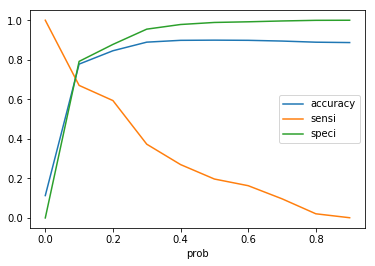

In [1716]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Since our objective is to maximise response rate while minimising the cost, we should look to maximise sensitivity as that will ensure we are correctly predicting the potential responders and hence minimise the marketing cost

#### Thus, from above graph we can see that Sensitivity is maximised at probability cut off of 0.1, which will be used for the prediction model

In [1717]:
# Making predictions on X_train using 0.1 probability cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Response_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Response,Response_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7019,0,0.024018,1,0,0,0,0,0,0,0,0,0,0
27175,0,0.072619,1,0,0,0,0,0,0,0,0,0,0
15817,0,0.047583,1,0,0,0,0,0,0,0,0,0,0
40971,0,0.275087,1,1,1,0,0,0,0,0,0,0,1
8467,0,0.068463,1,0,0,0,0,0,0,0,0,0,0


In [1718]:
y_train_pred_final2 = y_train_pred_final[['Actual_Response','Response_Prob', 'final_predicted']]
y_train_pred_final2.head()

,Actual_Response,Response_Prob,final_predicted
7019,0,0.024018,0
27175,0,0.072619,0
15817,0,0.047583,0
40971,0,0.275087,1
8467,0,0.068463,0


In [1719]:
# Creating X_test data for prediction purposes
X_test_1 = X_test[X_train_rfe.columns]
X_test_1.head()

,job_student,default_unknown,contact_telephone,month_mar,month_may,day_of_week_mon,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,0,0,0,0,1,0,1,0,-1.172918,-1.348603
27585,0,0,0,0,0,0,1,0,-0.644728,0.226981
15722,0,0,0,0,0,1,1,0,0.590583,0.768913
40349,0,0,0,0,0,0,0,1,0.778116,-1.574841
2576,0,0,1,0,1,0,1,0,0.721340,0.708890


In [1720]:
# Add a constant to X_test for prediction on test data purposes
X_test_sm = sm.add_constant(X_test_1)
X_test_sm.head()

,const,job_student,default_unknown,contact_telephone,month_mar,month_may,day_of_week_mon,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,1.0,0,0,0,0,1,0,1,0,-1.172918,-1.348603
27585,1.0,0,0,0,0,0,0,1,0,-0.644728,0.226981
15722,1.0,0,0,0,0,0,1,1,0,0.590583,0.768913
40349,1.0,0,0,0,0,0,0,0,1,0.778116,-1.574841
2576,1.0,0,0,1,0,1,0,1,0,0.721340,0.708890


In [1721]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred

33148    0.132841
27585    0.085852
15722    0.047756
40349    0.757323
2576     0.024159
33359    0.132841
26890    0.083461
8032     0.050240
13180    0.065213
10102    0.065350
20715    0.040351
19226    0.056369
35201    0.094031
3682     0.024119
183      0.017457
32842    0.071493
18653    0.065008
25456    0.081591
27125    0.061942
25235    0.080214
19724    0.056339
26685    0.083461
8182     0.049270
37459    0.637780
26991    0.083461
10611    0.065247
34980    0.135514
16324    0.046782
40353    0.414718
16282    0.065247
           ...   
692      0.024146
4269     0.024159
34445    0.093269
19840    0.056399
37805    0.642305
11983    0.065350
30958    0.129452
40338    0.336681
13733    0.065179
38039    0.308038
37308    0.221460
9766     0.034042
12516    0.047756
38887    0.334663
16235    0.055309
31808    0.130531
40633    0.705102
1627     0.024172
20606    0.056428
10964    0.065213
11684    0.046832
29766    0.219491
35771    0.101482
31470    0.065085
13136    0

In [1722]:
# Converting to dataframe
y_test_df = pd.DataFrame({'Actual_Response':y_test,'Response_Prob': y_test_pred[:]})
y_test_df.head()

,Actual_Response,Response_Prob
33148,0,0.132841
27585,0,0.085852
15722,0,0.047756
40349,1,0.757323
2576,0,0.024159


In [1723]:
y_test_df['final_predicted'] = y_test_df.Response_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_test_df.head()

,Actual_Response,Response_Prob,final_predicted
33148,0,0.132841,1
27585,0,0.085852,0
15722,0,0.047756,0
40349,1,0.757323,1
2576,0,0.024159,0


In [1724]:
# Evaluating the above model using ROC curve and confusion matrix
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test_df.Actual_Response, y_test_df.final_predicted))

0.7721129724043052


In [1725]:
confusion = metrics.confusion_matrix(y_test_df['Actual_Response'], y_test_df.final_predicted )
confusion

array([[8626, 2349],
       [ 467,  915]], dtype=int64)

In [1726]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1727]:
# Calculate sensitivity
TP / float(TP+FN)

0.6620839363241678

In [1728]:
# ROC curve


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1729]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_df.Actual_Response, y_test_df.Response_Prob, drop_intermediate = False )


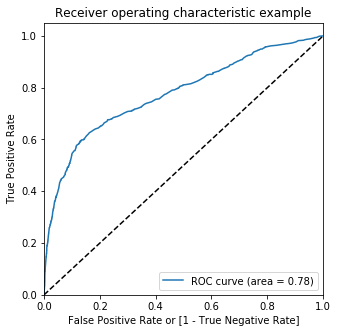

In [1730]:
# Call the ROC function

draw_roc(y_test_df.Actual_Response, y_test_df.Response_Prob)

#### We get an ROC of 78% which is very good model

In [1731]:
# Sorting the df using Response probability
y_test_df.sort_values(by='Response_Prob', ascending= False)

,Actual_Response,Response_Prob,final_predicted
39153,1,0.906963,1
39147,1,0.906963,1
39392,1,0.866868,1
39378,1,0.866803,1
39305,1,0.866284,1
39295,1,0.866089,1
39256,1,0.865894,1
39243,0,0.865829,1
39227,1,0.865698,1
39196,1,0.865633,1


### Question 3)

In [1732]:
y_test_df.head()

,Actual_Response,Response_Prob,final_predicted
33148,0,0.132841,1
27585,0,0.085852,0
15722,0,0.047756,0
40349,1,0.757323,1
2576,0,0.024159,0


In [1733]:
y_train_pred_final2.head()

,Actual_Response,Response_Prob,final_predicted
7019,0,0.024018,0
27175,0,0.072619,0
15817,0,0.047583,0
40971,0,0.275087,1
8467,0,0.068463,0


In [1734]:
# Appending y_train_predict_final2 and y_test_df in 1 dataframe
new_df = y_train_pred_final2.append(y_test_df)
new_df.head()


,Actual_Response,Response_Prob,final_predicted
7019,0,0.024018,0
27175,0,0.072619,0
15817,0,0.047583,0
40971,0,0.275087,1
8467,0,0.068463,0


In [1735]:
new_df.shape

(41188, 3)

In [1736]:
# adding duration of call & cost of call to the new df
new_df['duration'] = loan_copy['duration']
new_df['cost_per_call'] = new_df['duration']*1/60
new_df['Prospect_ID'] = range(1,41189)
new_df.head()

,Actual_Response,Response_Prob,final_predicted,duration,cost_per_call,Prospect_ID
7019,0,0.024018,0,102,1.700000,1
27175,0,0.072619,0,218,3.633333,2
15817,0,0.047583,0,333,5.550000,3
40971,0,0.275087,1,130,2.166667,4
8467,0,0.068463,0,267,4.450000,5


In [1737]:
# Resetting index
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,Actual_Response,Response_Prob,final_predicted,duration,cost_per_call,Prospect_ID
0,0,0.024018,0,102,1.700000,1
1,0,0.072619,0,218,3.633333,2
2,0,0.047583,0,333,5.550000,3
3,0,0.275087,1,130,2.166667,4
4,0,0.068463,0,267,4.450000,5


### Question 4)

In [1738]:
# Segregating the dataset into deciles. Please note that I've assumed that the analysis needs to be done on complete dataset and not just test dataset
new_df['decile'] = pd.qcut(new_df['Response_Prob'], 10, labels=np.arange(10, 0, -1))

In [1739]:
lift_df = new_df.groupby('decile')['Response_Prob'].count().reset_index()
lift_df

,decile,Response_Prob
0,10,4346
1,9,3980
2,8,4052
3,7,4301
4,6,4396
5,5,3673
6,4,4118
7,3,4274
8,2,3929
9,1,4119


In [1740]:
lift_df_pred = new_df[new_df['Actual_Response']==1].groupby('decile')['Actual_Response'].count().reset_index()
lift_df_pred

,decile,Actual_Response
0,10,137
1,9,125
2,8,204
3,7,253
4,6,223
5,5,227
6,4,237
7,3,380
8,2,838
9,1,2016


In [1741]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final

,decile,Response_Prob,Actual_Response
0,10,4346,137
1,9,3980,125
2,8,4052,204
3,7,4301,253
4,6,4396,223
5,5,3673,227
6,4,4118,237
7,3,4274,380
8,2,3929,838
9,1,4119,2016


In [1742]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final

,decile,Response_Prob,Actual_Response
9,1,4119,2016
8,2,3929,838
7,3,4274,380
6,4,4118,237
5,5,3673,227
4,6,4396,223
3,7,4301,253
2,8,4052,204
1,9,3980,125
0,10,4346,137


In [1743]:
lift_df_final['cumresp'] = lift_df_final['Actual_Response'].cumsum()
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp
9,1,4119,2016,2016
8,2,3929,838,2854
7,3,4274,380,3234
6,4,4118,237,3471
5,5,3673,227,3698
4,6,4396,223,3921
3,7,4301,253,4174
2,8,4052,204,4378
1,9,3980,125,4503
0,10,4346,137,4640


In [1744]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['Actual_Response']))
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp,gain
9,1,4119,2016,2016,43.448276
8,2,3929,838,2854,61.508621
7,3,4274,380,3234,69.698276
6,4,4118,237,3471,74.806034
5,5,3673,227,3698,79.698276
4,6,4396,223,3921,84.504310
3,7,4301,253,4174,89.956897
2,8,4052,204,4378,94.353448
1,9,3980,125,4503,97.047414
0,10,4346,137,4640,100.000000


In [1745]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [1746]:
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp,gain,cumlift
9,1,4119,2016,2016,43.448276,4.344828
8,2,3929,838,2854,61.508621,3.075431
7,3,4274,380,3234,69.698276,2.323276
6,4,4118,237,3471,74.806034,1.870151
5,5,3673,227,3698,79.698276,1.593966
4,6,4396,223,3921,84.504310,1.408405
3,7,4301,253,4174,89.956897,1.285099
2,8,4052,204,4378,94.353448,1.179418
1,9,3980,125,4503,97.047414,1.078305
0,10,4346,137,4640,100.000000,1.000000


In [1747]:
lift_df_final['avg_call_duration'] =  new_df.groupby('decile')['duration'].mean()
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp,gain,cumlift,avg_call_duration
9,1,4119,2016,2016,43.448276,4.344828,256.157286
8,2,3929,838,2854,61.508621,3.075431,232.750247
7,3,4274,380,3234,69.698276,2.323276,244.402697
6,4,4118,237,3471,74.806034,1.870151,226.817561
5,5,3673,227,3698,79.698276,1.593966,263.386333
4,6,4396,223,3921,84.504310,1.408405,249.570423
3,7,4301,253,4174,89.956897,1.285099,252.208002
2,8,4052,204,4378,94.353448,1.179418,270.045813
1,9,3980,125,4503,97.047414,1.078305,289.463219
0,10,4346,137,4640,100.000000,1.000000,NaN


From the above we can see how we can target X% of responders using the Gain column. For e.g. we can attain ~80% of total conversions by targeting only 50% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

### Question 5)

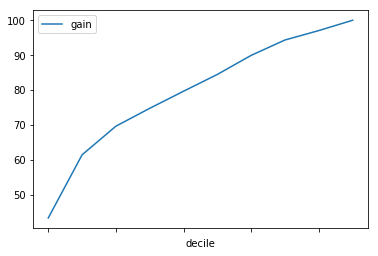

In [1748]:
# Lift chart
lift_df_final.plot.line(x='decile', y=['gain'])

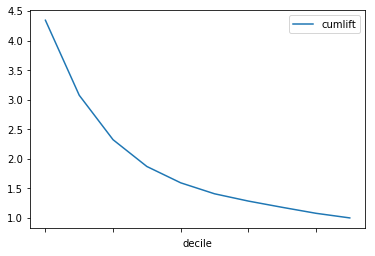

In [1749]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

### Question 6)

In [1750]:
# Cost of acquisition
new_df['campaign'] = loan['campaign']
lift_df_final['campaign'] =  new_df.groupby('decile')['campaign'].sum()
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp,gain,cumlift,avg_call_duration,campaign
9,1,4119,2016,2016,43.448276,4.344828,256.157286,9682.0
8,2,3929,838,2854,61.508621,3.075431,232.750247,10430.0
7,3,4274,380,3234,69.698276,2.323276,244.402697,10784.0
6,4,4118,237,3471,74.806034,1.870151,226.817561,11208.0
5,5,3673,227,3698,79.698276,1.593966,263.386333,9037.0
4,6,4396,223,3921,84.504310,1.408405,249.570423,10127.0
3,7,4301,253,4174,89.956897,1.285099,252.208002,10663.0
2,8,4052,204,4378,94.353448,1.179418,270.045813,9828.0
1,9,3980,125,4503,97.047414,1.078305,289.463219,10124.0
0,10,4346,137,4640,100.000000,1.000000,NaN,NaN


In [1754]:
lift_df_final['total_cost'] = lift_df_final['campaign']*lift_df_final['avg_call_duration']*1/60
lift_df_final['total_cumulative_cost'] =lift_df_final['total_cost'].cumsum()
lift_df_final['total_Response_Prob'] =lift_df_final['Response_Prob'].cumsum()
lift_df_final

,decile,Response_Prob,Actual_Response,cumresp,gain,cumlift,avg_call_duration,campaign,total_cost,total_cumulative_cost,total_Response_Prob
9,1,4119,2016,2016,43.448276,4.344828,256.157286,9682.0,41335.247454,41335.247454,4119
8,2,3929,838,2854,61.508621,3.075431,232.750247,10430.0,40459.751234,81794.998688,8048
7,3,4274,380,3234,69.698276,2.323276,244.402697,10784.0,43927.311416,125722.310104,12322
6,4,4118,237,3471,74.806034,1.870151,226.817561,11208.0,42369.520473,168091.830577,16440
5,5,3673,227,3698,79.698276,1.593966,263.386333,9037.0,39670.371477,207762.202054,20113
4,6,4396,223,3921,84.504310,1.408405,249.570423,10127.0,42123.327817,249885.529870,24509
3,7,4301,253,4174,89.956897,1.285099,252.208002,10663.0,44821.565399,294707.095270,28810
2,8,4052,204,4378,94.353448,1.179418,270.045813,9828.0,44233.504200,338940.599469,32862
1,9,3980,125,4503,97.047414,1.078305,289.463219,10124.0,48842.093858,387782.693327,36842
0,10,4346,137,4640,100.000000,1.000000,NaN,NaN,NaN,NaN,41188


#### From the above it is very clear that we spent approx $208K in contacting 80% of customers